
0: 416x1024 20 tooths, 36.1ms
Speed: 5.1ms preprocess, 36.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 1024)
Results: [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'tooth'}
obb: None
orig_img: array([[[133, 133, 133],
        [133, 133, 133],
        [133, 133, 133],
        ...,
        [108, 108, 108],
        [111, 111, 111],
        [114, 114, 114]],

       [[135, 135, 135],
        [132, 132, 132],
        [131, 131, 131],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [113, 113, 113]],

       [[131, 131, 131],
        [123, 123, 123],
        [130, 130, 130],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [118, 118, 118]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,

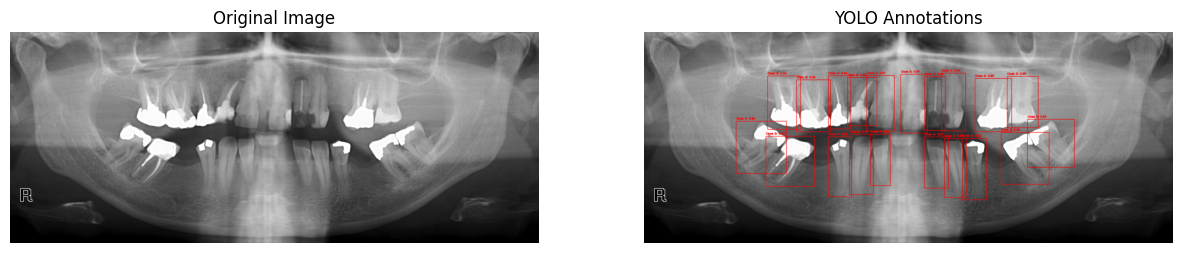

In [33]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLO model
yolo_model = YOLO(r"C:\teeth segmentation\Main task\MedSam\runs\detect\teeth_model47\weights\best.pt")

# Function to test the YOLO model
def test_yolo(image_path):
    # Read the input image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

    # Run inference
    results = yolo_model.predict(img, imgsz=1024, conf=0.5)  # Confidence threshold = 0.5
    
    # Debugging: Check the structure of `results`
    print("Results:", results)

    # Iterate over results and access bounding boxes
    for result in results:
        print("YOLO Bounding Boxes:", result.boxes.xyxy.cpu().numpy() if result.boxes is not None else "No boxes detected")
        
        # Annotate the image with bounding boxes
        annotated_img = img.copy()
        if result.boxes is not None:
            for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
                # Bounding box format: x_min, y_min, x_max, y_max
                x_min, y_min, x_max, y_max = map(int, box.cpu().numpy())
                conf = float(conf)  # Confidence score
                class_id = int(cls)  # Class ID

                # Draw bounding box
                cv2.rectangle(annotated_img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
                label = f"Class {class_id}: {conf:.2f}"
                cv2.putText(annotated_img, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        
        # Display the original and annotated images
        fig, axs = plt.subplots(1, 2, figsize=(15, 7))
        axs[0].imshow(img)
        axs[0].set_title("Original Image")
        axs[0].axis('off')
        
        axs[1].imshow(annotated_img)
        axs[1].set_title("YOLO Annotations")
        axs[1].axis('off')

        plt.show()

# Example usage
image_path = r"C:/teeth segmentation/Main task/Data/Images/45.png"  # Replace with your image path
test_yolo(image_path)


In [28]:
import os

input_folder = r"C:/teeth segmentation/Main task/Data/yolo-images"
annotation_folder =r"C:/teeth segmentation/Main task/Data/Yolo-labels"  # Folder containing the original annotations
output_annotation_folder = r"C:/teeth segmentation/Main task/Data"  # Folder to save resized annotations

os.makedirs(output_annotation_folder, exist_ok=True)

image_size = (1024, 1024)  # Target size

for img_name in os.listdir(input_folder):
    if img_name.endswith(('.jpg', '.png')):
        # Get original image size
        original_img_path = os.path.join(input_folder, img_name)
        original_img = Image.open(original_img_path)
        original_width, original_height = original_img.size

        # Load the corresponding annotation file
        annotation_file = os.path.splitext(img_name)[0] + '.txt'
        annotation_path = os.path.join(annotation_folder, annotation_file)

        # Create a new annotation file for resized images
        output_annotation_path = os.path.join(output_annotation_folder, annotation_file)

        with open(annotation_path, 'r') as f_in, open(output_annotation_path, 'w') as f_out:
            for line in f_in:
                parts = line.strip().split()
                class_id, x_center, y_center, width, height = map(float, parts)

                # Scale the YOLO annotations to fit the new image size (1024x1024)
                new_x_center = x_center * (image_size[0] / original_width)
                new_y_center = y_center * (image_size[1] / original_height)
                new_width = width * (image_size[0] / original_width)
                new_height = height * (image_size[1] / original_height)

                # Write the new annotation to the resized annotation file
                f_out.write(f"{class_id} {new_x_center} {new_y_center} {new_width} {new_height}\n")
